In [120]:
# linear regression with one variable
# read the data & seperate into input/output
import numpy as np
data = np.loadtxt('ex1data1.txt', delimiter = ',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

[  6.1101   5.5277   8.5186   7.0032   5.8598   8.3829   7.4764   8.5781
   6.4862   5.0546   5.7107  14.164    5.734    8.4084   5.6407   5.3794
   6.3654   5.1301   6.4296   7.0708   6.1891  20.27     5.4901   6.3261
   5.5649  18.945   12.828   10.957   13.176   22.203    5.2524   6.5894
   9.2482   5.8918   8.2111   7.9334   8.0959   5.6063  12.836    6.3534
   5.4069   6.8825  11.708    5.7737   7.8247   7.0931   5.0702   5.8014
  11.7      5.5416   7.5402   5.3077   7.4239   7.6031   6.3328   6.3589
   6.2742   5.6397   9.3102   9.4536   8.8254   5.1793  21.279   14.908
  18.959    7.2182   8.2951  10.236    5.4994  20.341   10.136    7.3345
   6.0062   7.2259   5.0269   6.5479   7.5386   5.0365  10.274    5.1077
   5.7292   5.1884   6.3557   9.7687   6.5159   8.5172   9.1802   6.002
   5.5204   5.0594   5.7077   7.6366   5.8707   5.3054   8.2934  13.394
   5.4369]


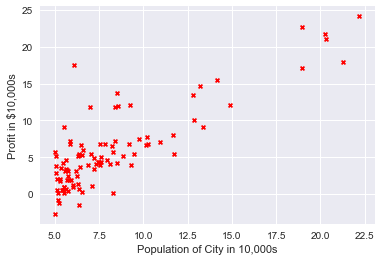

In [98]:
# visualise the data as a scatter plot
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

def plot_data(X, y):
    plt.scatter(X[:,1], y, marker='x', color='r', s = 15)
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.show()
plot_data(X, y)

In [237]:
# hypothesis, cost, and gradient functions
def h(X, theta=np.zeros((2,1))):

    h_theta = np.dot(X, theta)
    
    return h_theta


def cost(X, y, theta = np.zeros((2,1))):
    J = 0
    m = y.size

    J = float((1./(2*m)) * np.dot((h(X, theta) - y).T, (h(X, theta) - y)))
    
    return J

print cost(X, y)

32.0727338775


[-3.63029144  1.16636235]


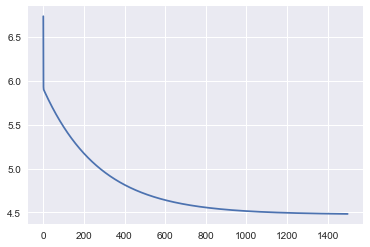

In [239]:
def gradient_descent(X, y, theta = np.zeros((2,1)), alpha=0.01, iterations=1500):
    J_hist = np.zeros(iterations)
    m = y.size

    for j in np.arange(iterations):


        theta = theta - alpha*(1./m)*(np.dot(X.T, h(X, theta) - y))

        J_hist[j] = cost(X, y, theta)

    return theta, J_hist

theta, J_hist = gradient_descent(X, y)
print theta.ravel()

plt.plot(J_hist)
plt.show()


5.0269


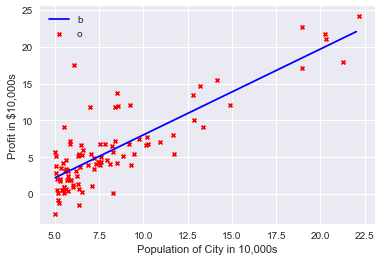

In [253]:
print np.min(X[:,1])

theta = theta.ravel()

x_ax = np.arange(np.min(X[:,1]), np.max(X[:,1]))
reg_line = theta[0] + theta[1]*x_ax


plt.scatter(X[:,1], y, marker='x', color='r', s = 15, label = 'training data')
plt.plot(x_ax, reg_line, color='b', label = 'linear regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.show()
